Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.applications import  DenseNet121
from tensorflow.keras.layers import  GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

import os
import cv2

***Load Data***

In [2]:
def load_image_data(directory):
    images = []
    labels = []
    for label in sorted(os.listdir(directory)):
        for image in os.listdir(directory + "/" + label ):
            img = cv2.imread(directory + "/" + label+ "/" +image)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,(240,240))
            images.append(img)
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return (images,labels)

In [3]:
# Delete all .DS_Store files in the specified directory and its subdirectories
!find /Users/kevlar/Desktop/SU24Research/app/oxford-flowers/test_dir/test_dir -name '.DS_Store' -type f -delete

In [4]:
X_train,y_train=load_image_data('/Users/kevlar/Desktop/SU24Research/app/oxford-flowers/test_dir/test_dir')

In [5]:
X_test, y_test = load_image_data('/Users/kevlar/Desktop/SU24Research/app/oxford-flowers/train_dir/train_dir')
X_val, y_val = load_image_data('/Users/kevlar/Desktop/SU24Research/app/oxford-flowers/valid_dir/valid_dir')

In [6]:
labels={'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 '2': 'hard-leaved pocket orchid',
 '54': 'sunflower',
 '66': 'osteospermum',
 '70': 'tree poppy',
 '85': 'desert-rose',
 '99': 'bromelia',
 '87': 'magnolia',
 '5': 'english marigold',
 '92': 'bee balm',
 '28': 'stemless gentian',
 '97': 'mallow',
 '57': 'gaura',
 '40': 'lenten rose',
 '47': 'marigold',
 '59': 'orange dahlia',
 '48': 'buttercup',
 '55': 'pelargonium',
 '36': 'ruby-lipped cattleya',
 '91': 'hippeastrum',
 '29': 'artichoke',
 '71': 'gazania',
 '90': 'canna lily',
 '18': 'peruvian lily',
 '98': 'mexican petunia',
 '8': 'bird of paradise',
 '30': 'sweet william',
 '17': 'purple coneflower',
 '52': 'wild pansy',
 '84': 'columbine',
 '12': "colt's foot",
 '11': 'snapdragon',
 '96': 'camellia',
 '23': 'fritillary',
 '50': 'common dandelion',
 '44': 'poinsettia',
 '53': 'primula',
 '72': 'azalea',
 '65': 'californian poppy',
 '80': 'anthurium',
 '76': 'morning glory',
 '37': 'cape flower',
 '56': 'bishop of llandaff',
 '60': 'pink-yellow dahlia',
 '82': 'clematis',
 '58': 'geranium',
 '75': 'thorn apple',
 '41': 'barbeton daisy',
 '95': 'bougainvillea',
 '43': 'sword lily',
 '83': 'hibiscus',
 '78': 'lotus',
 '88': 'cyclamen',
 '94': 'foxglove',
 '81': 'frangipani',
 '74': 'rose',
 '89': 'watercress',
 '73': 'water lily',
 '46': 'wallflower',
 '77': 'passion flower',
 '51': 'petunia'}

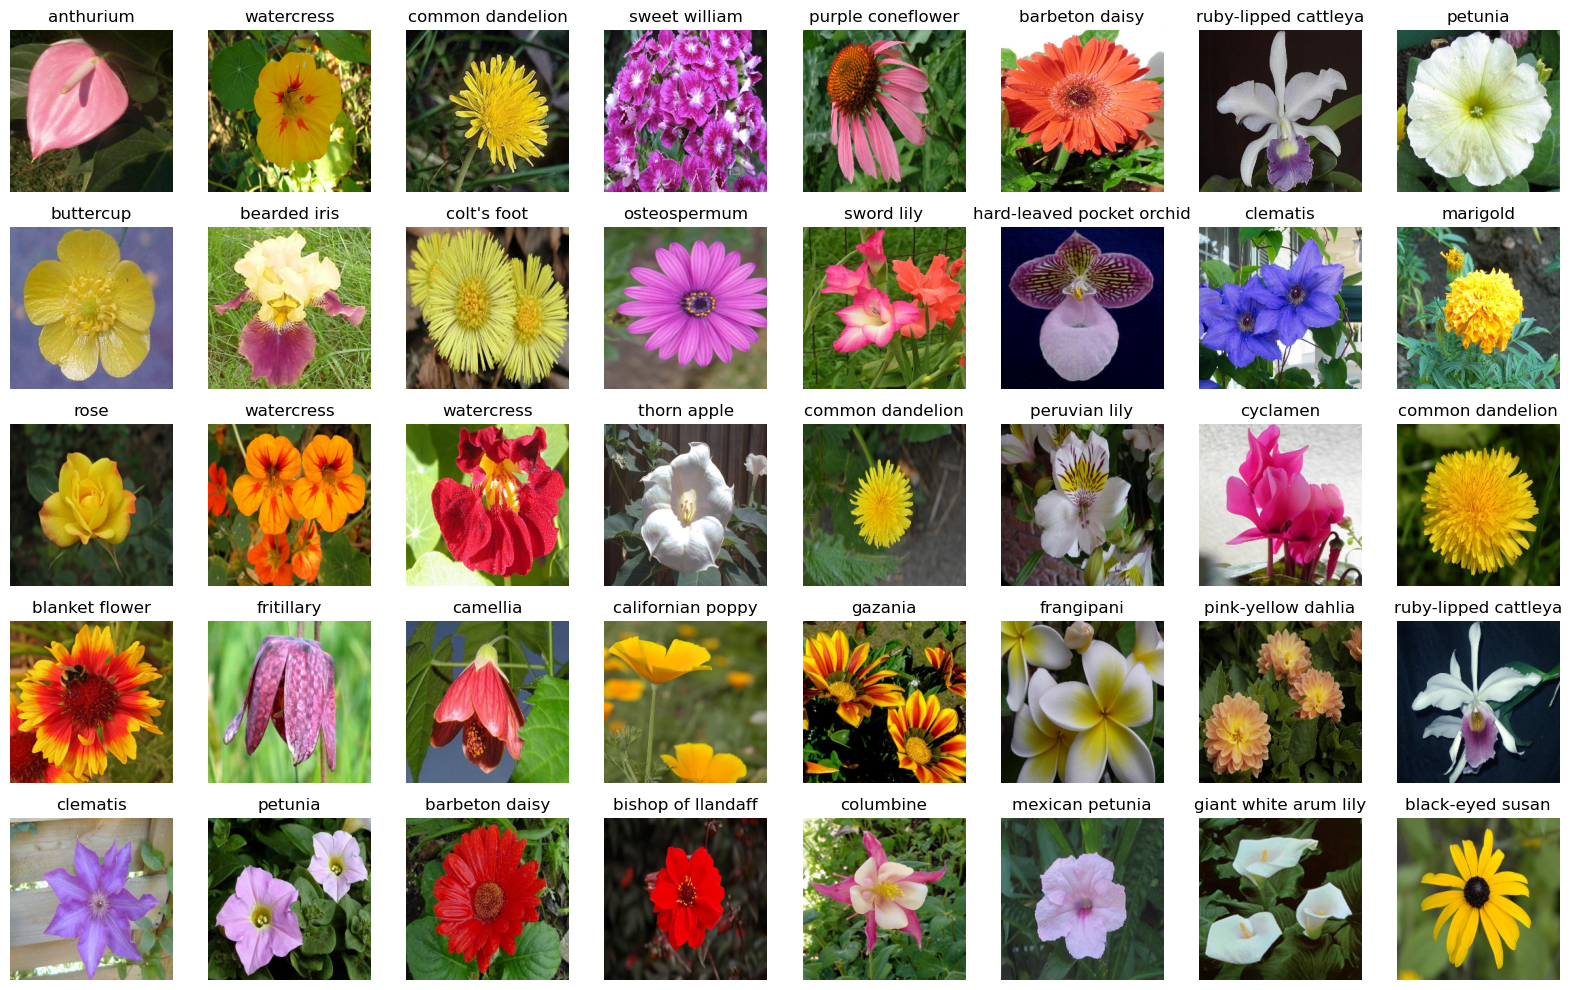

In [7]:
random_numbers = np.random.randint(1, len(X_train), 40)

fig, axes = plt.subplots(5, 8, figsize=(16, 10))

for i, ax in enumerate(axes.flat):
    n = random_numbers[i]
    image = X_train[n]
    label = labels[ y_train[n]]

    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val=X_val/255



label_binarizer = LabelBinarizer()
y_train_cat = label_binarizer.fit_transform(y_train)
y_test_cat = label_binarizer.transform(y_test)
y_val_cat = label_binarizer.transform(y_val)

In [9]:
def create_finetuned_model(base_model, num_classes):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(102, activation='softmax')
    ])
    return model

In [10]:
densenet121_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(240, 240, 3))
for layer in densenet121_base.layers:
    layer.trainable = False

In [11]:
num_classes = 102
densenet121_model = create_finetuned_model(densenet121_base, num_classes)

In [12]:
densenet121_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ 'accuracy'])
densenet_history=densenet121_model.fit(X_train, y_train_cat, epochs=12, batch_size=64, validation_data=(X_val, y_val_cat))

Epoch 1/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.4211 - loss: 2.7872 - val_accuracy: 0.7814 - val_loss: 0.8995
Epoch 2/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.8884 - loss: 0.4668 - val_accuracy: 0.8108 - val_loss: 0.6802
Epoch 3/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 306s 3s/step - accuracy: 0.9296 - loss: 0.2969 - val_accuracy: 0.8637 - val_loss: 0.4748
Epoch 4/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.9620 - loss: 0.1569 - val_accuracy: 0.8873 - val_loss: 0.4099
Epoch 5/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.9855 - loss: 0.0878 - val_accuracy: 0.8961 - val_loss: 0.3688
Epoch 6/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.9861 - loss: 0.0727 - val_accuracy: 0.9000 - val_loss: 0.3708
Epoch 7/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 347s 4s/step - accuracy: 0.9981 - loss: 0.0365 - val_accuracy: 0.9069 - val_loss: 0.3458
Epoch 8/12
97/97 ━━━━━━━━━━━━━━━━━━━━ 332s 3s/step - accuracy: 0.9985 - loss: 0.0234 - val_accuracy: 0.9020 - v

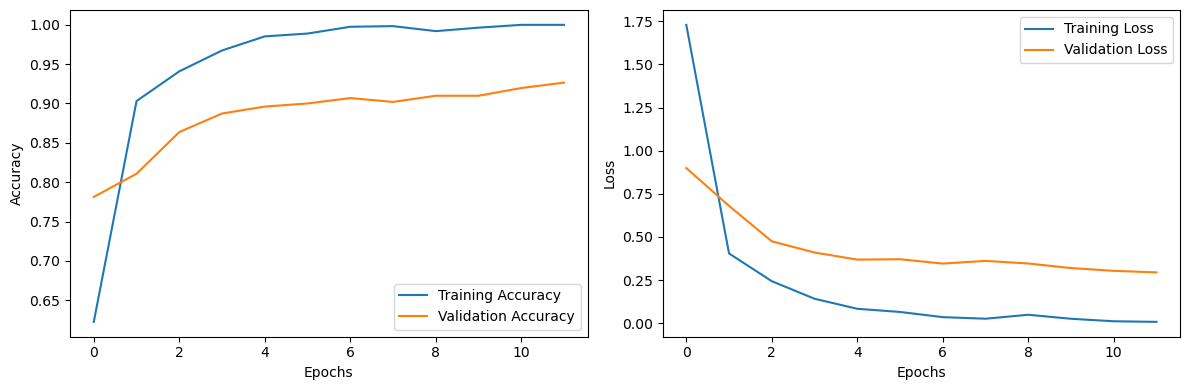

In [13]:
#densenet history plot
training_accuracy = densenet_history.history['accuracy']
validation_accuracy = densenet_history.history['val_accuracy']
training_loss = densenet_history.history['loss']
validation_loss = densenet_history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
y_pred=densenet121_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Use argmax to get the true class indices
y_true_classes = np.argmax(y_test_cat, axis=1)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10
           5       0.75      0.90      0.82        10
           6       0.90      0.90      0.90        10
           7       1.00      0.80      0.89        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       0.91      1.00      0.95        10
          13       0.82      0.90      0.86        10
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      1.00      1.0

In [15]:
# !pip install coremltools

In [21]:
# Path to save the model
model_path = 'saved_model/densenet121_model.h5'

# Delete the existing file if it exists
if os.path.exists(model_path):
    os.remove(model_path)

# Save the model
# densenet121_model.save(model_path)


In [24]:
# Save the model with a different name
densenet121_model.save('saved_model/densenet121_model.keras')


***save checkpoint***

In [ ]:
# # Save the model checkpoint
# checkpoint_path = "model_checkpoint"
# densenet121_model.save(checkpoint_path)
# print(f'Model checkpoint saved at {checkpoint_path}')

# Save the Keras model as a SavedModel
# densenet121_model.save("densenet121_model")
# import tensorflow as tf

# Save the Keras model as a SavedModel
# tf.saved_model.save(densenet121_model, "saved_model/densenet121_model")



INFO:tensorflow:Assets written to: saved_model/densenet121_model/assets


INFO:tensorflow:Assets written to: saved_model/densenet121_model/assets


In [27]:
# loaded_model = tf.keras.models.load_model('saved_model/densenet121_model.keras')
# # Convert the SavedModel to TFLite
# converter = tf.lite.TFLiteConverter.from_saved_model("saved_model/densenet121_model.keras")
# tflite_model = converter.convert()


In [ ]:

# Save the converted TFLite model
# with open("densenet121_model.tflite", "wb") as f:
#     f.write(tflite_model)

In [ ]:
# # Convert the SavedModel to TFLite
# converter = tf.lite.TFLiteConverter.from_saved_model("densenet121_model")
# tflite_model = converter.convert()

# with open("densenet121_model.tflite", "wb") as f:
#     f.write(tflite_model)

***reload model if kernel dead***

In [ ]:
# import tensorflow as tf

# Define the path to the saved checkpoint
# checkpoint_path = "densenet121_model"

# Load the model from the checkpoint
# loaded_model = tf.keras.models.load_model(checkpoint_path)
# print(f'Model loaded from {checkpoint_path}')

# # Convert the model to TensorFlow Lite format
# converter = tf.lite.TFLiteConverter.from_saved_model(checkpoint_path)
# tflite_model = converter.convert()

# # Save the TensorFlow Lite model
# tflite_model_path = 'model.tflite'
# with open(tflite_model_path, 'wb') as f:
#     f.write(tflite_model)
# print(f'TensorFlow Lite model saved at {tflite_model_path}')

ValueError: File format not supported: filepath=densenet121_model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(densenet121_model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
# Convert the Keras model to TFLite with optimizations
# converter = tf.lite.TFLiteConverter.from_keras_model(densenet121_model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_model = converter.convert()

# Save the converted model to a file
# with open("densenet121_model.tflite", "wb") as f:
    # f.write(tflite_model)

In [ ]:
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [ ]:
# tflite_model = converter.convert()

KeyboardInterrupt: 

In [ ]:
# # Save the converted model to a file
# with open("densenet121_model.tflite", "wb") as f:
#     f.write(tflite_model)